# DQDW Task 3: Tidy up your Data

In [1]:
import pandas as pd
import numpy as np
import os
import uuid
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the Dataset

In [57]:
# read single tables
directory = "data/"
files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

for f in files:    
    df = pd.read_csv(directory+f)
    print("\n", f.rsplit('.', 1)[0].replace("-", " ").capitalize())
    # look for empty rows
    print("Has empty rows?")
    print(df.isna().all(axis=1).any())
    # look for duplicates
    print("Has duplicated rows?")
    print(df.duplicated().any())
    #print(df.info())
    # look at the structure of the df
    #print(df.head(5))  ## comment out for performance if script is rerun
    # skimm for noise, i.e. items names that aren't real items
    #print(list(df['name_enus'].unique()))  ## comment out for performance if script is rerun
    # look at items without slot
    print(df['name_enus'][df['slotbak'].isna()].unique())  ## comment out for performance if script is rerun


 Back
Has empty rows?
True
Has duplicated rows?
True
['Formula: Enchant Cloak - Binding of Intellect'
 'Formula: Enchant Cloak - Binding of Agility'
 'Formula: Enchant Cloak - Binding of Strength'
 'Formula: Enchant Cloak - Word of Intellect'
 'Formula: Enchant Cloak - Word of Strength'
 'Formula: Enchant Cloak - Word of Agility' nan]

 Chest
Has empty rows?
True
Has duplicated rows?
True
['Medium Armor Kit' 'Heavy Armor Kit' 'Thick Armor Kit' 'Rugged Armor Kit'
 'Knothide Armor Kit' 'Core Armor Kit' 'Heavy Knothide Armor Kit'
 'Greater Rune of Warding' 'Lesser Rune of Warding'
 "Vindicator's Armor Kit" "Magister's Armor Kit" 'Heavy Borean Armor Kit'
 'Borean Armor Kit' 'Savage Armor Kit' 'Sha Armor Kit' nan]

 Feet
Has empty rows?
True
Has duplicated rows?
True
['Medium Armor Kit' 'Heavy Armor Kit' 'Thick Armor Kit' 'Rugged Armor Kit'
 'Knothide Armor Kit' 'Core Armor Kit' 'Heavy Knothide Armor Kit'
 "Vindicator's Armor Kit" "Magister's Armor Kit" 'Heavy Borean Armor Kit'
 'Borean Ar

## Reduce Noise & Join Tables

In [2]:
# get all file names in the directory
directory = "data/"
files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# exclude thrown items from the data set since they are no longer equipable weapons
files.remove('thrown.csv')

data = pd.DataFrame()

for f in files:
    # get category from file name
    category = f.rsplit('.', 1)[0].replace("-", " ").capitalize()
    
    # read file
    df = pd.read_csv(directory+f)
    
    # delete empty rows and duplicates
    df.dropna(how='all', axis=0, inplace=True)
    df.drop_duplicates(inplace=True)
    
    # add category column
    df['category'] = category

    # append each df to the data df
    data = pd.concat([data, df], ignore_index=True)

# exclude consumable items and item enhancement items that do not have a slot
data.drop(data[data['slotbak'].isna()].index, inplace=True)

# exculde items with generic item names that do not correspond to item names in game
data.drop(data[(data['name_enus'] == 'RING') | (data['name_enus'] == 'Ring')].index, inplace=True)
# excude placeholder items
data.drop(data[data['name_enus'].str.contains(' PH ')].index, inplace=True)
data.drop(data[data['name_enus'].str.contains(' Raid - ')].index, inplace=True)

data

,agi,agiint,agistr,agistrint,arcres,armor,atkpwr,classes,cooldown,critstrkrtng,...,rgdatkpwr,rgddmgmax,rgddmgmin,rgddps,rgdspeed,holres,avoidance,resirtng,spi,splcritstrkrtng
0,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58213,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Warrior,NaN,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58214,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Paladin,NaN,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58215,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Death knight,NaN,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58216,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Paladin,NaN,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57689 entries, 0 to 58217
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   agi              23676 non-null  float64
 1   agiint           17217 non-null  float64
 2   agistr           633 non-null    float64
 3   agistrint        933 non-null    float64
 4   arcres           56 non-null     float64
 5   armor            41011 non-null  float64
 6   atkpwr           1 non-null      float64
 7   classes          14022 non-null  object 
 8   cooldown         1218 non-null   float64
 9   critstrkrtng     25079 non-null  float64
 10  dodgertng        1220 non-null   float64
 11  firres           207 non-null    float64
 12  frores           158 non-null    float64
 13  hastertng        18661 non-null  float64
 14  int              42226 non-null  float64
 15  itemset          6067 non-null   float64
 16  mastrtng         11909 non-null  float64
 17  name_enus        

In [4]:
data.describe()

,agi,agiint,agistr,agistrint,arcres,armor,atkpwr,cooldown,critstrkrtng,dodgertng,...,rgdatkpwr,rgddmgmax,rgddmgmin,rgddps,rgdspeed,holres,avoidance,resirtng,spi,splcritstrkrtng
count,23676.000000,17217.000000,633.000000,933.000000,56.000000,41011.000000,1.0,1218.000000,25079.000000,1220.000000,...,2.000000,1030.000000,1030.000000,1030.000000,1030.000000,0.0,2.000000,3.0,1.0,1.0
mean,63.328434,53.450717,103.665087,399.879957,11.178571,50.370852,11.0,0.108511,18.467802,12.131967,...,26.500000,89.431068,62.240777,27.875000,2.991864,NaN,22.500000,6.0,19.0,29.0
std,802.461271,568.254127,1991.678644,2745.815049,7.544070,277.464379,NaN,0.758130,24.880518,4.484387,...,14.849242,129.393271,103.528780,79.702472,0.150726,NaN,4.949747,0.0,NaN,NaN
min,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,11.0,0.000278,1.000000,3.000000,...,16.000000,2.000000,1.000000,0.620000,0.060000,NaN,19.000000,6.0,19.0,29.0
25%,13.000000,14.000000,9.000000,23.000000,5.000000,12.000000,11.0,0.016667,9.000000,9.000000,...,21.250000,40.000000,26.000000,11.540000,3.000000,NaN,20.750000,6.0,19.0,29.0
50%,18.000000,18.000000,13.000000,26.000000,8.000000,23.000000,11.0,0.033333,12.000000,11.000000,...,26.500000,62.000000,38.000000,17.420000,3.000000,NaN,22.500000,6.0,19.0,29.0
75%,27.000000,30.000000,18.000000,69.000000,17.000000,42.000000,11.0,0.033333,17.000000,15.000000,...,31.750000,76.000000,49.000000,20.570000,3.000000,NaN,24.250000,6.0,19.0,29.0
max,50116.000000,36316.000000,50116.000000,33084.000000,29.000000,27386.000000,11.0,24.000000,1009.000000,32.000000,...,37.000000,1024.000000,981.000000,2208.070000,3.000000,NaN,26.000000,6.0,19.0,29.0


## Alter Columns
* Add *Slot* column based on the item category and remove *slotbak* column
* Add *OnUseEffect* column based on *cooldown*
* Add *SetItem* column to indicate whether an item hast a set bonus and remove *itemset* which contains inaccurate item set IDs
* Add *ProfReq* column with the required profession and remove *reqspell* which is too specific
* Add *ID* column as unique identifier
* Remove *socketX* columns which contain incomplete data

### Substitute *slotbak* by *Slot*
Items fit into different item slots. Slotbak contains a wowhead specific item slot ID that doesn't correspond to the item slot ID in the game which could be used in macros. It is not transparent how wowhead determines the slot numbers, since they do not correspond to the slot IDs ingame. Thus, the column doesn't add valuable information.

In [5]:
data['category'].unique()

array(['Back', 'Chest', 'Feet', 'Finger', 'Hands', 'Head',
       'Held in off hand', 'Legs', 'Main hand', 'Neck', 'Off hand',
       'One hand', 'Ranged', 'Shield', 'Shirt', 'Shoulder', 'Tabard',
       'Trinket', 'Two hand', 'Waist', 'Wrist'], dtype=object)

In [6]:
# define mapping from item category to in-game slot ID
category_slot = {
    'Head': 1,
    'Neck': 2,
    'Shoulder': 3,
    'Shirt': 4,
    'Chest': 5,
    'Waist': 6,
    'Legs': 7,
    'Feet': 8,
    'Wrist': 9,
    'Hands': 10,
    'Finger': 11,
    'Trinket': 13,
    'Back': 15,
    'Main hand': 16,
    'One hand': 16,
    'Ranged': 16,
    'Two hand': 16,
    'Held in off hand': 17,
    'Off hand': 17,
    'Shield': 17,
    'Tabard': 19
}

# Create a new column using map()
data['Slot'] = data['category'].map(category_slot)

data

,agi,agiint,agistr,agistrint,arcres,armor,atkpwr,classes,cooldown,critstrkrtng,...,rgddmgmax,rgddmgmin,rgddps,rgdspeed,holres,avoidance,resirtng,spi,splcritstrkrtng,Slot
0,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58213,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Warrior,NaN,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
58214,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Paladin,NaN,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
58215,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Death knight,NaN,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
58216,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Paladin,NaN,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [7]:
# delete the slot columns with wowhead slots
data.drop('slotbak', axis=1, inplace=True)
print(data.shape)

(57689, 66)


### Add OnUseEffect Column
Add the column *OnUseEffect* as boolean and set True if the column *cooldown* has a value.

In [8]:
data['OnUseEffect'] = data['cooldown'].notnull()
data[['name_enus', 'OnUseEffect', 'cooldown']][data['OnUseEffect'] == True]

,name_enus,OnUseEffect,cooldown
283,Wrap of Unity,True,4.000000
284,Cloak of Coordination,True,2.000000
286,Shroud of Cooperation,True,8.000000
462,Cloak of Fire,True,0.033333
674,Skywitch's Drape,True,0.500000
...,...,...,...
50528,Barbaric Belt,True,0.333333
50685,Nigh-Invulnerability Belt,True,0.083333
57923,Hyperthread Wristwraps,True,0.033333
57996,Anodized Deflectors,True,0.008333


### Substitute *itemset* by *SetItem*
The column *itemset* probably contains a wowhead set ID. This set ID indicates that items belong to a set and all items with the same set ID should form a set, but this is not always the case. The assignment of set IDs is inaccurate whereas the information on whether an item is a set item seems to be accurate. Thus, a *SetItem* column is created as type boolean to indicate whether an item is part of a set based on the set ID in *itemset* and the *itemset* column is removed.

In [9]:
data['SetItem'] = data['itemset'].notnull()
data[['name_enus', 'SetItem', 'itemset']][data['SetItem'] == True]

,name_enus,SetItem,itemset
525,Drape of Vaulted Secrets,True,504.0
530,Cloak of Unending Life,True,494.0
539,Drape of Unyielding Strength,True,495.0
543,Cape of Eternal Justice,True,506.0
544,Cloak of the Unseen Path,True,510.0
...,...,...,...
30530,Deathlord's Legguards,True,1269.0
30533,Leggings of Azj'Aqir,True,1291.0
30540,Farseer's Leggings,True,1278.0
30553,Leggings of the Uncrowned,True,1277.0


In [10]:
data.drop('itemset', axis=1, inplace=True)
print(data.shape)

(57689, 67)


### Substitute *reqspell* by *ProfReq*
Add a column that contains the required profession for equipping and item. The columns is based on the column *reqspell* which contains the spell ID of the required profession receipt. This spell ID only applies to profession items and is a bit abstract and too specific, thus we will create a new columns containing the required profession or 'None' (as string). And later remove the columns *reqspell*.

In [11]:
 data[['name_enus', 'category', 'reqspell']][data['reqspell'].notnull()]  # all profession item in the data set are Enngineering items!
                                                                            # Other professions are missing...

,name_enus,category,reqspell
20708,Foreman's Reinforced Helmet,Head,20222.0
20717,Gnomish Battle Goggles,Head,20219.0
20745,Foreman's Enchanted Helmet,Head,20222.0
20773,Gnomish Power Goggles,Head,20219.0
44367,Goblin Rocket Launcher,Trinket,20222.0
44378,Gnomish Poultryizer,Trinket,20219.0


In [12]:
data['ProfReq'] = np.where(data['reqspell'].notnull(), 'Engineering', 'None')

print(data['ProfReq'].unique())

data[['name_enus', 'ProfReq', 'reqspell']][data['ProfReq'] != 'None']

['None' 'Engineering']


,name_enus,ProfReq,reqspell
20708,Foreman's Reinforced Helmet,Engineering,20222.0
20717,Gnomish Battle Goggles,Engineering,20219.0
20745,Foreman's Enchanted Helmet,Engineering,20222.0
20773,Gnomish Power Goggles,Engineering,20219.0
44367,Goblin Rocket Launcher,Engineering,20222.0
44378,Gnomish Poultryizer,Engineering,20219.0


In [13]:
data.drop('reqspell', axis=1, inplace=True)
print(data.shape)

(57689, 67)


### Add ID Column
Add a uuid for each item as unique identifier and primary key.

In [14]:
data.insert(0, 'ID', [uuid.uuid4() for _ in range(len(data))])
data

,ID,agi,agiint,agistr,agistrint,arcres,armor,atkpwr,classes,cooldown,...,rgdspeed,holres,avoidance,resirtng,spi,splcritstrkrtng,Slot,OnUseEffect,SetItem,ProfReq
0,c782eab5-db7a-4030-9ecd-c0482fa72293,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15,False,False,None
1,bc1132f0-fde1-4d75-b273-84077eac6886,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15,False,False,None
2,b1c50be6-c6c7-4592-b2c7-792214a83303,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15,False,False,None
3,11606c40-c038-4d44-913a-a86fd725b728,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15,False,False,None
4,3b293678-913c-470a-8ec5-115fe7a31d60,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58213,fc075057-f2f1-48d0-90b8-913b8d3011cd,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Warrior,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,False,False,None
58214,b99a6d88-825f-48ad-806f-ba214288262b,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Paladin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,False,False,None
58215,88e9914a-e638-4bf2-a669-42e1a67d29f4,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Death knight,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,False,False,None
58216,3405a78e-cb60-423e-b42a-67bfa8246ffe,NaN,NaN,NaN,NaN,NaN,309.0,NaN,Paladin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,False,False,None


### Remove socket Columns
The nsocket columns gives information on the number of sockets an item has. The columns *socket1*, *socket2*, and *socket3* contain the type of socket, but there are socket types missing and the data is inconsistent. As shown below, in the data is only one socket type listed, whereas in the game several different socket types exist. It the following it is shown, that despite of *nsocket* giving a number of sockets, the corresponding values in socketX are missing if the socket type is any other than 'Prismatic Socket'. The data is incomplete and cannot be filled in reasonably. Thus the incomplete columns are removed.

In [15]:
data['socket3'].unique()  # there a socket types missing!

array([nan, 'Prismatic socket'], dtype=object)

In [16]:
empty_sockets = data[['name_enus', 'category', 'Slot',
                      'nsockets', 'socket1', 'socket2', 'socket3']][(data['nsockets'].isnull()) & (data['socket1'].notnull())]
empty_sockets  # same result for socket2 and socket3; nsockets seems to be correct

,name_enus,category,Slot,nsockets,socket1,socket2,socket3


In [17]:
empty_sockets = data[['name_enus', 'category', 'Slot',
                      'nsockets', 'socket1', 'socket2', 'socket3']][(data['nsockets'] == 2) & (data['socket1'].isnull())]
empty_sockets  # values are also missing for all other combinations of nsockets and socket1/2/3 which should contain socket types!

,name_enus,category,Slot,nsockets,socket1,socket2,socket3
21011,Cursed Vision of Sargeras,Head,1,2.0,NaN,Prismatic socket,NaN
21013,Voidheart Crown,Head,1,2.0,NaN,Prismatic socket,NaN
21016,Deathmantle Helm,Head,1,2.0,NaN,Prismatic socket,NaN
21017,Destroyer Greathelm,Head,1,2.0,NaN,Prismatic socket,NaN
21019,Netherblade Facemask,Head,1,2.0,NaN,Prismatic socket,NaN
...,...,...,...,...,...,...,...
23331,Grievous Gladiator's Felweave Cowl,Head,1,2.0,NaN,Prismatic socket,NaN
23332,Helmet of the All-Consuming Maw,Head,1,2.0,NaN,Prismatic socket,NaN
23333,Grievous Gladiator's Ironskin Helm,Head,1,2.0,NaN,Prismatic socket,NaN
23334,Hood of Stilled Winds,Head,1,2.0,NaN,Prismatic socket,NaN


In [18]:
# delete socket columns since the data on socket type is incomplete and doesn't add value
data.drop(['socket1', 'socket2', 'socket3'], axis=1, inplace=True)
data.shape

(57689, 65)

## Reorder & Rename Columns
Reorder columns in a more meaningful way and choose informative column names.

In [19]:
cols = data.columns.to_list()
print(len(cols))
cols

65


['ID',
 'agi',
 'agiint',
 'agistr',
 'agistrint',
 'arcres',
 'armor',
 'atkpwr',
 'classes',
 'cooldown',
 'critstrkrtng',
 'dodgertng',
 'firres',
 'frores',
 'hastertng',
 'int',
 'mastrtng',
 'name_enus',
 'natres',
 'nsockets',
 'parryrtng',
 'quality',
 'reqlevel',
 'rgdhastepct',
 'speed',
 'splhastepct',
 'sta',
 'str',
 'strint',
 'versatility',
 'category',
 'dura',
 'reqarenartng',
 'dmg',
 'healthrgn',
 'lifesteal',
 'rgdcritstrkrtng',
 'speedbonus',
 'armorbonus',
 'manargn',
 'splpwr',
 'sturdiness',
 'dmgmax1',
 'dmgmin1',
 'dps',
 'mledmgmax',
 'mledmgmin',
 'mledps',
 'mlespeed',
 'pvppower',
 'corruption',
 'rgdatkpwr',
 'rgddmgmax',
 'rgddmgmin',
 'rgddps',
 'rgdspeed',
 'holres',
 'avoidance',
 'resirtng',
 'spi',
 'splcritstrkrtng',
 'Slot',
 'OnUseEffect',
 'SetItem',
 'ProfReq']

### Create Lists with column names

In [20]:
# define custom order of the columns
custom_order = ['ID', 'name_enus', 'category', 'Slot', 'quality', 'classes', 'reqlevel',
                'reqarenartng', 'ProfReq', 'OnUseEffect', 'nsockets', 'SetItem', 'agi', 'agiint',
                'agistr', 'agistrint', 'arcres', 'armor', 'atkpwr', 'avoidance', 'cooldown',
                'critstrkrtng', 'dodgertng', 'firres', 'frores', 'hastertng', 'int', 'mastrtng',
                'natres', 'parryrtng', 'rgdhastepct', 'speed', 'splhastepct', 'sta', 'str',
                'strint', 'versatility', 'dura', 'dmg', 'healthrgn', 'lifesteal',
                'rgdcritstrkrtng', 'speedbonus', 'armorbonus', 'manargn', 'splpwr',
                'sturdiness', 'dmgmax1', 'dmgmin1', 'dps', 'mledmgmax', 'mledmgmin', 'mledps',
                'mlespeed', 'pvppower', 'corruption', 'rgdatkpwr', 'rgddmgmax', 'rgddmgmin',
                'rgddps', 'rgdspeed', 'holres', 'resirtng', 'spi', 'splcritstrkrtng']

# define custom name for the columns
custom_col_names = ['ID', 'Name', 'Category', 'Slot', 'Quality', 'Class', 'LvlReq',
                    'ArenaRatingReq', 'ProfReq', 'OnUseEffect', 'Sockets', 'SetItem', 'Agility',
                    'AgilityIntellect', 'AgilityStrength', 'AgiStrInt', 'ArcaneResistance',
                    'Armor', 'AttackPower', 'Avoidance', 'Cooldown', 'CritStrikeRating',
                    'DodgeRating', 'FireResistance', 'FrostResistance', 'Haste', 'Intellect',
                    'Mastery', 'NatureResistance', 'ParryRating', 'RangedHastePercentage',
                    'Speed', 'SpellHastePercentage', 'Stamina', 'Strength', 'StrengthIntellect',
                    'Versatility', 'Durability', 'Damage', 'HealthReg', 'Lifesteal',
                    'RangedCritStrikeRating', 'SpeedBonus', 'ArmorBonus', 'ManaReg', 'SpellPower', 'Sturdiness', 'DamageMax',
                    'DamageMin', 'DPS', 'MeleeDamageMax', 'MeleeDamageMin', 'MeleeDPS',
                    'MeleeSpeed', 'PVPPower', 'Corruption', 'RangedAttackPower',
                    'RangedDamageMax', 'RangedDamageMin', 'RangedDPS', 'RangedSpeed',
                    'HolyResistance', 'PVPResilience', 'Spirit', 'SpellCritStrikeRating']
print(len(custom_order))
print(len(custom_col_names))

65
65


In [21]:
data = data[custom_order]
data.columns = custom_col_names
data

,ID,Name,Category,Slot,Quality,Class,LvlReq,ArenaRatingReq,ProfReq,OnUseEffect,...,Corruption,RangedAttackPower,RangedDamageMax,RangedDamageMin,RangedDPS,RangedSpeed,HolyResistance,PVPResilience,Spirit,SpellCritStrikeRating
0,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Back,15,Epic,NaN,10.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bc1132f0-fde1-4d75-b273-84077eac6886,Stormpike Sage's Cloak,Back,15,Epic,NaN,10.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b1c50be6-c6c7-4592-b2c7-792214a83303,Frostwolf Legionnaire's Cloak,Back,15,Epic,NaN,10.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11606c40-c038-4d44-913a-a86fd725b728,Banner Cloak,Back,15,Uncommon,NaN,NaN,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3b293678-913c-470a-8ec5-115fe7a31d60,Demon Scarred Cloak,Back,15,Common,NaN,5.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58213,fc075057-f2f1-48d0-90b8-913b8d3011cd,Oathsworn Armguards,Wrist,9,Uncommon,Warrior,120.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58214,b99a6d88-825f-48ad-806f-ba214288262b,Sunsoul Armplates,Wrist,9,Uncommon,Paladin,120.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58215,88e9914a-e638-4bf2-a669-42e1a67d29f4,Heart-Lesion Armguards,Wrist,9,Uncommon,Death knight,120.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58216,3405a78e-cb60-423e-b42a-67bfa8246ffe,Sunsoul Armguards,Wrist,9,Uncommon,Paladin,120.0,NaN,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fill in Missing Values & Change Data Types/ Units
Convert columns that can only take on integer values to integers where values exist and round floating point numbers where values exist.
* *LvlReq*, *ArenaRatingReq*, and *Sockets* are supposed to be integers.
* *Class* is filled with 'all' as a placeholder
* *cooldown* contains values of the cooldown duration for items with an on-use effect in hours, but most cooldowns have much shorter durations that can be better expressed in minutes and rounded to three decimal places

In [22]:
# convert columns to int type that can only contain whole numbers
data['LvlReq'] = data['LvlReq'].fillna(0).astype(int)
data['ArenaRatingReq'] = data['ArenaRatingReq'].fillna(0).astype(int)
data['Sockets'] = data['Sockets'].fillna(0).astype(int)

# fill column with default value that cannot be empty
data = data.fillna({'Class': 'all'})

# convert cooldown duration to minutes and round to 3 decimal places
data['Cooldown'] = (data['Cooldown'] * 60).round(3)

print(data.info())
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
data.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 57689 entries, 0 to 58217
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      57689 non-null  object 
 1   Name                    57689 non-null  object 
 2   Category                57689 non-null  object 
 3   Slot                    57689 non-null  int64  
 4   Quality                 57689 non-null  object 
 5   Class                   57689 non-null  object 
 6   LvlReq                  57689 non-null  int32  
 7   ArenaRatingReq          57689 non-null  int32  
 8   ProfReq                 57689 non-null  object 
 9   OnUseEffect             57689 non-null  bool   
 10  Sockets                 57689 non-null  int32  
 11  SetItem                 57689 non-null  bool   
 12  Agility                 23676 non-null  float64
 13  AgilityIntellect        17217 non-null  float64
 14  AgilityStrength         633 non-null    flo

,ID,Name,Category,Slot,Quality,Class,LvlReq,ArenaRatingReq,ProfReq,OnUseEffect,...,Corruption,RangedAttackPower,RangedDamageMax,RangedDamageMin,RangedDPS,RangedSpeed,HolyResistance,PVPResilience,Spirit,SpellCritStrikeRating
0,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Back,15,Epic,all,10,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bc1132f0-fde1-4d75-b273-84077eac6886,Stormpike Sage's Cloak,Back,15,Epic,all,10,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b1c50be6-c6c7-4592-b2c7-792214a83303,Frostwolf Legionnaire's Cloak,Back,15,Epic,all,10,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11606c40-c038-4d44-913a-a86fd725b728,Banner Cloak,Back,15,Uncommon,all,0,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3b293678-913c-470a-8ec5-115fe7a31d60,Demon Scarred Cloak,Back,15,Common,all,5,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9651ebd2-63d5-4aa6-8de6-cae4080011e2,Silver Embroidered Cloak,Back,15,Rare,all,0,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,df86a42d-5a3b-43c4-85bf-337c4c139a0d,Imbued Infantry Cloak,Back,15,Uncommon,all,4,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2fa461bc-91da-4dae-9c29-2dd37e1f1325,Incorruptable Shawl,Back,15,Uncommon,all,0,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1443eb84-c4fd-49f7-bff0-489c9b74a652,Rathorian's Cape,Back,15,Uncommon,all,10,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,da216219-1bb9-4cbf-8669-a92adddc7bcd,Cloak of the Clarion Call,Back,15,Rare,all,0,0,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

## Split Table
The table is splitted into 3 tables called *items*, *classes*, and *stats* to store them in a storage efficient normalized format in a DB.
### Create items Table

In [24]:
# create the items table containing general information on the item
item_cols = ['ID', 'Name', 'Category', 'Slot', 'Quality', 'LvlReq', 'ArenaRatingReq',
             'ProfReq', 'OnUseEffect', 'Sockets', 'SetItem']
items = data[item_cols]

print(items.info())
items

<class 'pandas.core.frame.DataFrame'>
Index: 57689 entries, 0 to 58217
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              57689 non-null  object
 1   Name            57689 non-null  object
 2   Category        57689 non-null  object
 3   Slot            57689 non-null  int64 
 4   Quality         57689 non-null  object
 5   LvlReq          57689 non-null  int32 
 6   ArenaRatingReq  57689 non-null  int32 
 7   ProfReq         57689 non-null  object
 8   OnUseEffect     57689 non-null  bool  
 9   Sockets         57689 non-null  int32 
 10  SetItem         57689 non-null  bool  
dtypes: bool(2), int32(3), int64(1), object(5)
memory usage: 3.9+ MB
None


,ID,Name,Category,Slot,Quality,LvlReq,ArenaRatingReq,ProfReq,OnUseEffect,Sockets,SetItem
0,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Back,15,Epic,10,0,None,False,0,False
1,bc1132f0-fde1-4d75-b273-84077eac6886,Stormpike Sage's Cloak,Back,15,Epic,10,0,None,False,0,False
2,b1c50be6-c6c7-4592-b2c7-792214a83303,Frostwolf Legionnaire's Cloak,Back,15,Epic,10,0,None,False,0,False
3,11606c40-c038-4d44-913a-a86fd725b728,Banner Cloak,Back,15,Uncommon,0,0,None,False,0,False
4,3b293678-913c-470a-8ec5-115fe7a31d60,Demon Scarred Cloak,Back,15,Common,5,0,None,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...
58213,fc075057-f2f1-48d0-90b8-913b8d3011cd,Oathsworn Armguards,Wrist,9,Uncommon,120,0,None,False,0,False
58214,b99a6d88-825f-48ad-806f-ba214288262b,Sunsoul Armplates,Wrist,9,Uncommon,120,0,None,False,0,False
58215,88e9914a-e638-4bf2-a669-42e1a67d29f4,Heart-Lesion Armguards,Wrist,9,Uncommon,120,0,None,False,0,False
58216,3405a78e-cb60-423e-b42a-67bfa8246ffe,Sunsoul Armguards,Wrist,9,Uncommon,120,0,None,False,0,False


### Create stats Table

In [25]:
no_stat_cols = ['Category', 'Slot', 'Quality', 'Class', 'LvlReq', 'ArenaRatingReq',
                'ProfReq', 'OnUseEffect', 'Sockets', 'SetItem']
stats = data.drop(columns=no_stat_cols)
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57689 entries, 0 to 58217
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      57689 non-null  object 
 1   Name                    57689 non-null  object 
 2   Agility                 23676 non-null  float64
 3   AgilityIntellect        17217 non-null  float64
 4   AgilityStrength         633 non-null    float64
 5   AgiStrInt               933 non-null    float64
 6   ArcaneResistance        56 non-null     float64
 7   Armor                   41011 non-null  float64
 8   AttackPower             1 non-null      float64
 9   Avoidance               2 non-null      float64
 10  Cooldown                1218 non-null   float64
 11  CritStrikeRating        25079 non-null  float64
 12  DodgeRating             1220 non-null   float64
 13  FireResistance          207 non-null    float64
 14  FrostResistance         158 non-null    flo

### Reformat Stats Table
To bring the table into tidy format all columns except *ID* and *Name* are melted into one stat column and one value column.

In [26]:
# columns to keep
id_vars = ['ID', 'Name']

# melt the DataFrame
stats = pd.melt(
    stats,
    id_vars=id_vars,
    var_name="Stat",
    value_name="Value"
)

stats = stats.sort_values(by="ID").reset_index(drop=True)

stats

,ID,Name,Stat,Value
0,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,DPS,10.85
1,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,Lifesteal,NaN
2,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,DodgeRating,NaN
3,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,RangedSpeed,NaN
4,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,Corruption,NaN
...,...,...,...,...
3057512,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,AgiStrInt,45.00
3057513,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,RangedDamageMax,NaN
3057514,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,DodgeRating,NaN
3057515,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,Corruption,NaN


In [27]:
# drop all rows where the value is nan (the item doesn't have this stat)
stats.drop(stats[stats['Value'].isna()].index, inplace=True)

stats

,ID,Name,Stat,Value
0,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,DPS,10.85
6,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,MeleeSpeed,2.60
7,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,CritStrikeRating,9.00
11,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,Strength,9.00
18,00006a80-ccd6-40f6-9604-dedde71dc946,High Warlord's Hacker,DamageMax,38.00
...,...,...,...,...
3057476,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,Agility,45.00
3057483,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,Mastery,44.00
3057490,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,Intellect,45.00
3057505,fffe8df8-7e5d-49b3-b2f3-9ddd09e0a690,Oathsworn Defender Idol,Strength,45.00


### Create classes Table

In [28]:
classes = data[['ID', 'Name', 'Class']]
classes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57689 entries, 0 to 58217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      57689 non-null  object
 1   Name    57689 non-null  object
 2   Class   57689 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


### Reformat classes Table
To bring the table into tidy format, a column for each class is created and filled with one or nan depending on whether the item can be equipped by that class. Afterwards, all class columns are melted into one class column containing only one class name.

In [29]:
# list of all classes
all_classes = ['Demon hunter', 'Death knight', 'Druid', 'Hunter', 'Mage', 'Monk', 'Paladin', 'Priest', 'Rogue', 'Shaman', 'Warlock', 'Warrior']

# expand 'all' and split multiple classes
def expand_classes(class_name):
    if class_name == 'all':
        return all_classes
    return class_name.split(',')

# create tidy df
classes.loc[:, 'Class'] = classes['Class'].apply(expand_classes)
classes = classes.explode('Class', ignore_index=True)

classes

,ID,Name,Class
0,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Demon hunter
1,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Death knight
2,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Druid
3,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Hunter
4,c782eab5-db7a-4030-9ecd-c0482fa72293,Stormpike Soldier's Cloak,Mage
...,...,...,...
539779,fc075057-f2f1-48d0-90b8-913b8d3011cd,Oathsworn Armguards,Warrior
539780,b99a6d88-825f-48ad-806f-ba214288262b,Sunsoul Armplates,Paladin
539781,88e9914a-e638-4bf2-a669-42e1a67d29f4,Heart-Lesion Armguards,Death knight
539782,3405a78e-cb60-423e-b42a-67bfa8246ffe,Sunsoul Armguards,Paladin


In [30]:
print(items)
print(classes)
print(stats)

                                         ID                           Name  \
0      c782eab5-db7a-4030-9ecd-c0482fa72293      Stormpike Soldier's Cloak   
1      bc1132f0-fde1-4d75-b273-84077eac6886         Stormpike Sage's Cloak   
2      b1c50be6-c6c7-4592-b2c7-792214a83303  Frostwolf Legionnaire's Cloak   
3      11606c40-c038-4d44-913a-a86fd725b728                   Banner Cloak   
4      3b293678-913c-470a-8ec5-115fe7a31d60            Demon Scarred Cloak   
...                                     ...                            ...   
58213  fc075057-f2f1-48d0-90b8-913b8d3011cd            Oathsworn Armguards   
58214  b99a6d88-825f-48ad-806f-ba214288262b              Sunsoul Armplates   
58215  88e9914a-e638-4bf2-a669-42e1a67d29f4         Heart-Lesion Armguards   
58216  3405a78e-cb60-423e-b42a-67bfa8246ffe              Sunsoul Armguards   
58217  517317f4-46a8-4ce2-87ca-35e2ff10a5d7            Springrain Bindings   

      Category  Slot   Quality  LvlReq  ArenaRatingReq ProfReq 

## Create Exploratory Visualizations

In [31]:
sns.set_theme(style='whitegrid', context='paper')

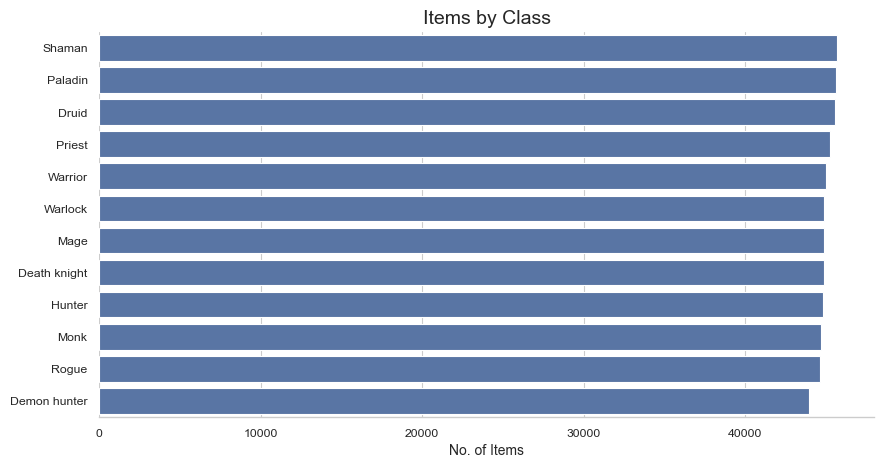

In [32]:
# sort classes by counts
sorted_order = classes['Class'].value_counts().index

# create countplot
countplt, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data=classes, y='Class', order=sorted_order)
ax.set_title('Items by Class', size=14)
ax.set_ylabel(None)
ax.set_xlabel('No. of Items', size=10)

sns.despine(left=True)
plt.show()

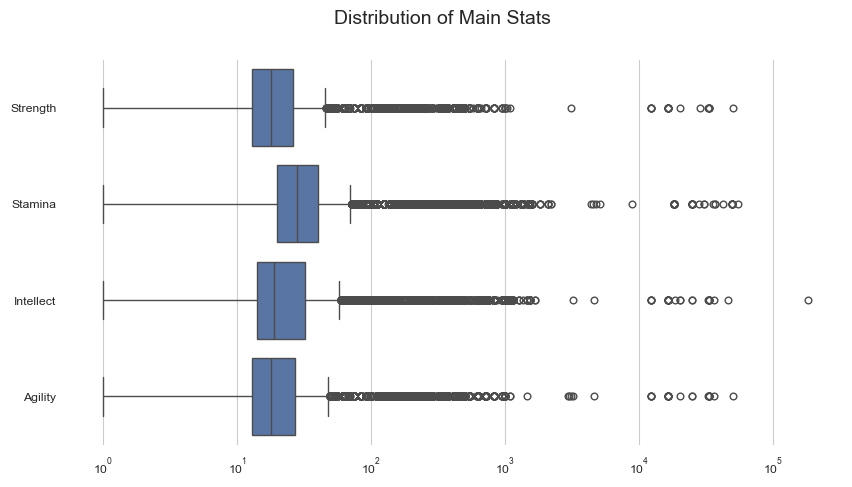

In [33]:
# create subset of stats table containing only the main stats: strength, intellect, agility, stamina
main_stats = stats[(stats['Stat'] == 'Strength') | (stats['Stat'] == 'Intellect') | (stats['Stat'] == 'Agility') | (stats['Stat'] == 'Stamina')]
#print(main_stats)

# boxplot for distribution of main stats
boxplt, ax = plt.subplots(figsize=(10, 5))
boxplt.suptitle('Distribution of Main Stats', size=14)
ax = sns.boxplot(data=main_stats, x='Value', y='Stat', orient='h')
plt.xscale('log')
ax.set_xlabel(None)
ax.set_ylabel(None)

sns.despine(left=True, bottom=True)
plt.show()

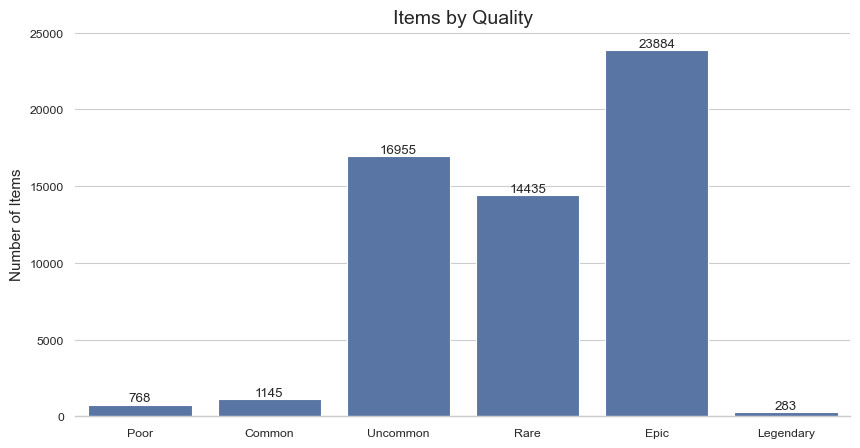

In [34]:
# sort classes by counts
sorted_order = ['Poor', 'Common', 'Uncommon', 'Rare', 'Epic', 'Legendary']

# create countplot
countplt, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data=items[(items['Quality'] != 'Artifact') & (items['Quality'] != 'Heirloom')], x='Quality', order=sorted_order)
ax.set_title('Items by Quality', size=14)
ax.set_xlabel(None)
ax.set_ylabel('Number of Items', size=11)

for rect in ax.patches:
    ax.text(x=rect.get_x()+rect.get_width()/2, y=rect.get_height()+200, s=int(rect.get_height()), horizontalalignment='center')

sns.despine(left=True)
plt.show()